<a href="https://www.kaggle.com/code/lalit7881/mas-feature-analytics?scriptVersionId=300567888" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasets/algozee/mas-feature-evaluation-dataset/mas_dataset.csv


## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/datasets/algozee/mas-feature-evaluation-dataset/mas_dataset.csv")

In [3]:
df.head()

,role_based_architecture,dynamic_task_decomposition,inter_agent_communication_protocol,long_term_shared_memory,tool_usage_capability,reflection_self_critique_loop,conflict_resolution_mechanism,adaptive_role_switching,performance_monitoring_dashboard,autonomous_decision_making_layer,multi_modal_capability,collaboration_efficiency_scoring,hierarchical_agent_structure,secure_permission_system,self_improving_learning_mechanism
0,1,0,0,1,1,1,0,1,1,0,0,1,0,0,0
1,1,0,0,0,1,1,1,1,0,0,0,0,0,1,1
2,1,1,0,0,1,1,1,1,1,1,0,0,0,0,1
3,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0
4,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1


In [4]:
df.tail()

,role_based_architecture,dynamic_task_decomposition,inter_agent_communication_protocol,long_term_shared_memory,tool_usage_capability,reflection_self_critique_loop,conflict_resolution_mechanism,adaptive_role_switching,performance_monitoring_dashboard,autonomous_decision_making_layer,multi_modal_capability,collaboration_efficiency_scoring,hierarchical_agent_structure,secure_permission_system,self_improving_learning_mechanism
2495,1,1,1,0,1,1,1,1,0,0,0,1,0,0,1
2496,1,0,0,1,1,1,1,1,1,1,1,1,0,1,1
2497,0,0,1,1,1,0,0,1,0,0,1,0,1,0,1
2498,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0
2499,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   role_based_architecture             2500 non-null   int64
 1   dynamic_task_decomposition          2500 non-null   int64
 2   inter_agent_communication_protocol  2500 non-null   int64
 3   long_term_shared_memory             2500 non-null   int64
 4   tool_usage_capability               2500 non-null   int64
 5   reflection_self_critique_loop       2500 non-null   int64
 6   conflict_resolution_mechanism       2500 non-null   int64
 7   adaptive_role_switching             2500 non-null   int64
 8   performance_monitoring_dashboard    2500 non-null   int64
 9   autonomous_decision_making_layer    2500 non-null   int64
 10  multi_modal_capability              2500 non-null   int64
 11  collaboration_efficiency_scoring    2500 non-null   int64
 12  hierar

In [6]:
df.describe()

,role_based_architecture,dynamic_task_decomposition,inter_agent_communication_protocol,long_term_shared_memory,tool_usage_capability,reflection_self_critique_loop,conflict_resolution_mechanism,adaptive_role_switching,performance_monitoring_dashboard,autonomous_decision_making_layer,multi_modal_capability,collaboration_efficiency_scoring,hierarchical_agent_structure,secure_permission_system,self_improving_learning_mechanism
count,2500.000000,2500.000000,2500.0000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.0000,2500.0000,2500.000000,2500.000000,2500.000000
mean,0.488800,0.508400,0.5000,0.507600,0.498400,0.494400,0.502000,0.495200,0.516800,0.496400,0.5000,0.5200,0.486800,0.498400,0.502000
std,0.499975,0.500029,0.5001,0.500042,0.500097,0.500069,0.500096,0.500077,0.499818,0.500087,0.5001,0.4997,0.499926,0.500097,0.500096
min,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.5000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.5000,1.0000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.0000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.0000,1.000000,1.000000,1.000000


In [7]:
df.isnull().sum()

role_based_architecture               0
dynamic_task_decomposition            0
inter_agent_communication_protocol    0
long_term_shared_memory               0
tool_usage_capability                 0
reflection_self_critique_loop         0
conflict_resolution_mechanism         0
adaptive_role_switching               0
performance_monitoring_dashboard      0
autonomous_decision_making_layer      0
multi_modal_capability                0
collaboration_efficiency_scoring      0
hierarchical_agent_structure          0
secure_permission_system              0
self_improving_learning_mechanism     0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(99)

In [9]:
df.dtypes

role_based_architecture               int64
dynamic_task_decomposition            int64
inter_agent_communication_protocol    int64
long_term_shared_memory               int64
tool_usage_capability                 int64
reflection_self_critique_loop         int64
conflict_resolution_mechanism         int64
adaptive_role_switching               int64
performance_monitoring_dashboard      int64
autonomous_decision_making_layer      int64
multi_modal_capability                int64
collaboration_efficiency_scoring      int64
hierarchical_agent_structure          int64
secure_permission_system              int64
self_improving_learning_mechanism     int64
dtype: object

In [10]:
df.shape

(2500, 15)

In [11]:
df.nunique()

role_based_architecture               2
dynamic_task_decomposition            2
inter_agent_communication_protocol    2
long_term_shared_memory               2
tool_usage_capability                 2
reflection_self_critique_loop         2
conflict_resolution_mechanism         2
adaptive_role_switching               2
performance_monitoring_dashboard      2
autonomous_decision_making_layer      2
multi_modal_capability                2
collaboration_efficiency_scoring      2
hierarchical_agent_structure          2
secure_permission_system              2
self_improving_learning_mechanism     2
dtype: int64

In [12]:
df.columns

Index(['role_based_architecture', 'dynamic_task_decomposition',
       'inter_agent_communication_protocol', 'long_term_shared_memory',
       'tool_usage_capability', 'reflection_self_critique_loop',
       'conflict_resolution_mechanism', 'adaptive_role_switching',
       'performance_monitoring_dashboard', 'autonomous_decision_making_layer',
       'multi_modal_capability', 'collaboration_efficiency_scoring',
       'hierarchical_agent_structure', 'secure_permission_system',
       'self_improving_learning_mechanism'],
      dtype='object')

## EDA

In [13]:
import plotly.express as px
import plotly.graph_objects as go

sns.set(style="whitegrid")

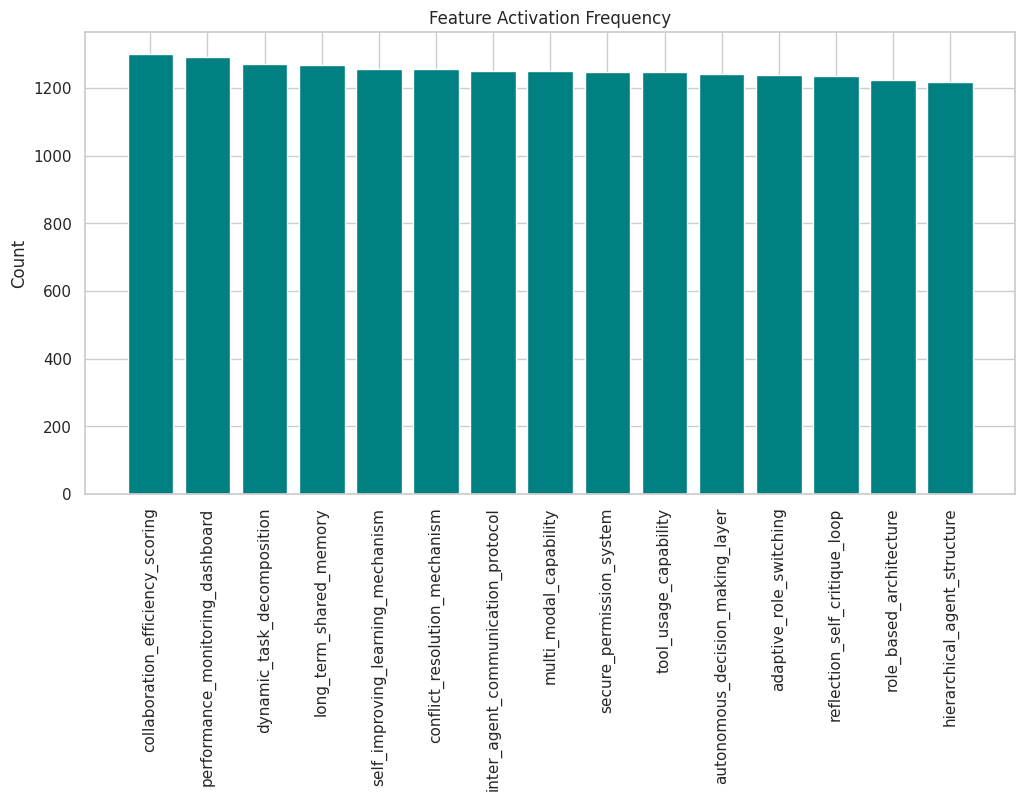

In [14]:
feature_sum = df.sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
plt.bar(feature_sum.index, feature_sum.values, color='teal')
plt.xticks(rotation=90)
plt.title("Feature Activation Frequency")
plt.ylabel("Count")
plt.show()

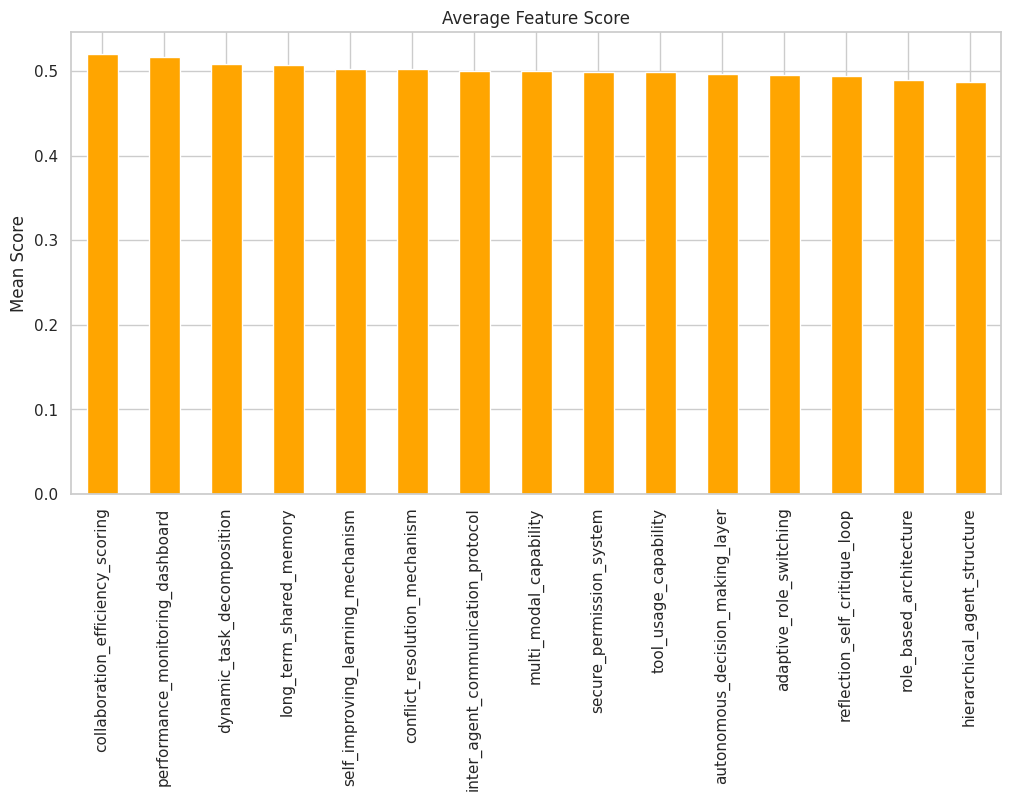

In [15]:
feature_mean = df.mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
feature_mean.plot(kind='bar', color='orange')
plt.title("Average Feature Score")
plt.ylabel("Mean Score")
plt.xticks(rotation=90)
plt.show()

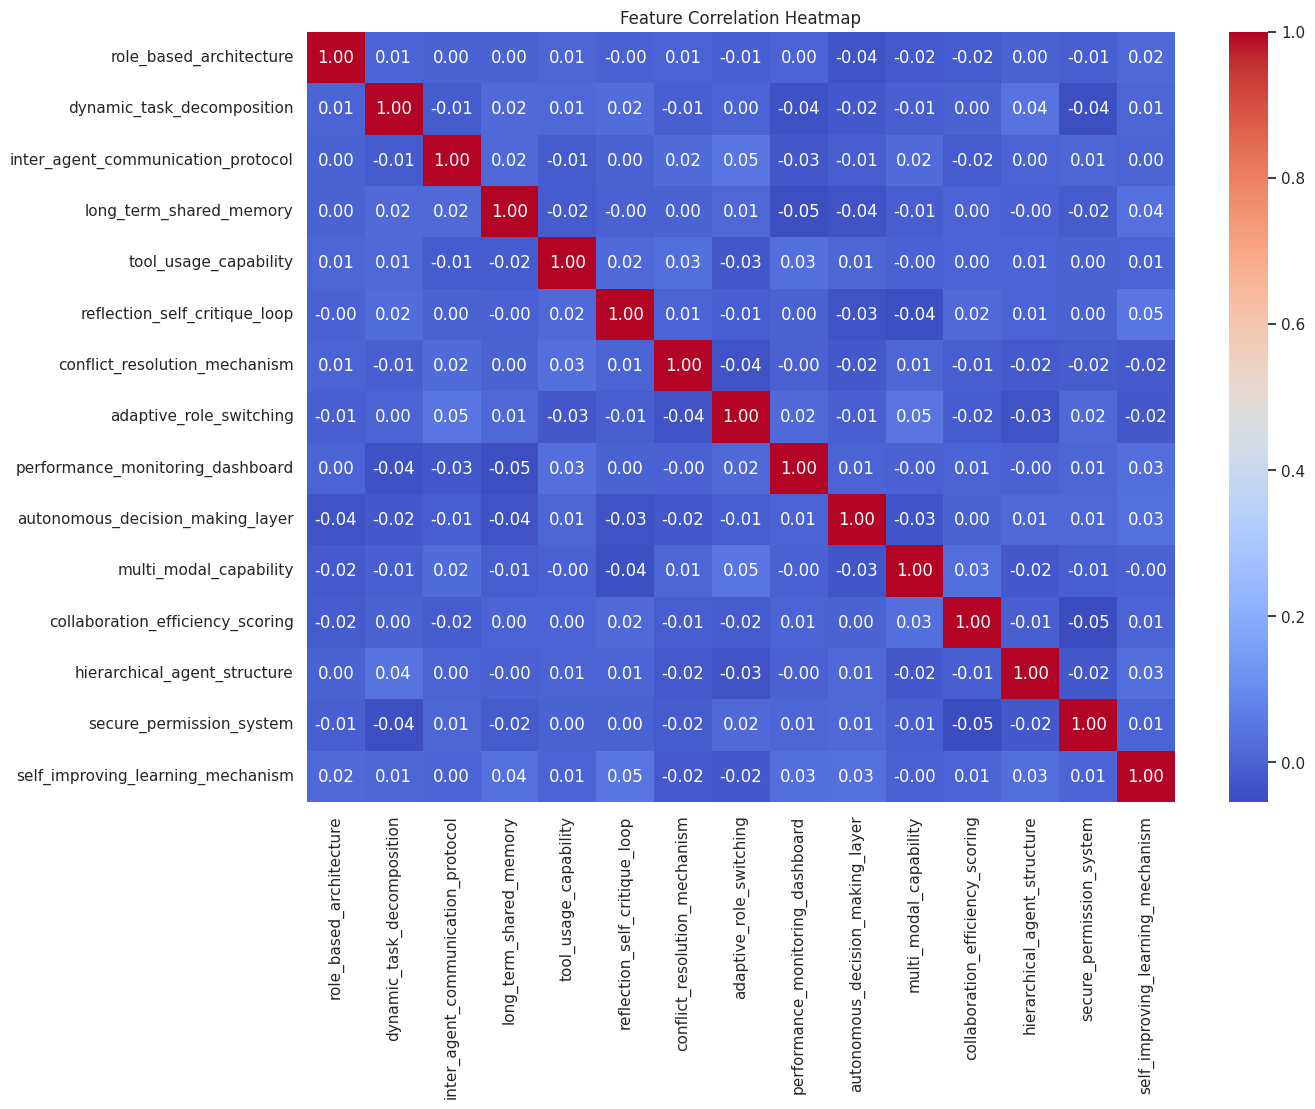

In [16]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),
            annot=True,
            cmap='coolwarm',
            fmt=".2f")

plt.title("Feature Correlation Heatmap")
plt.show()

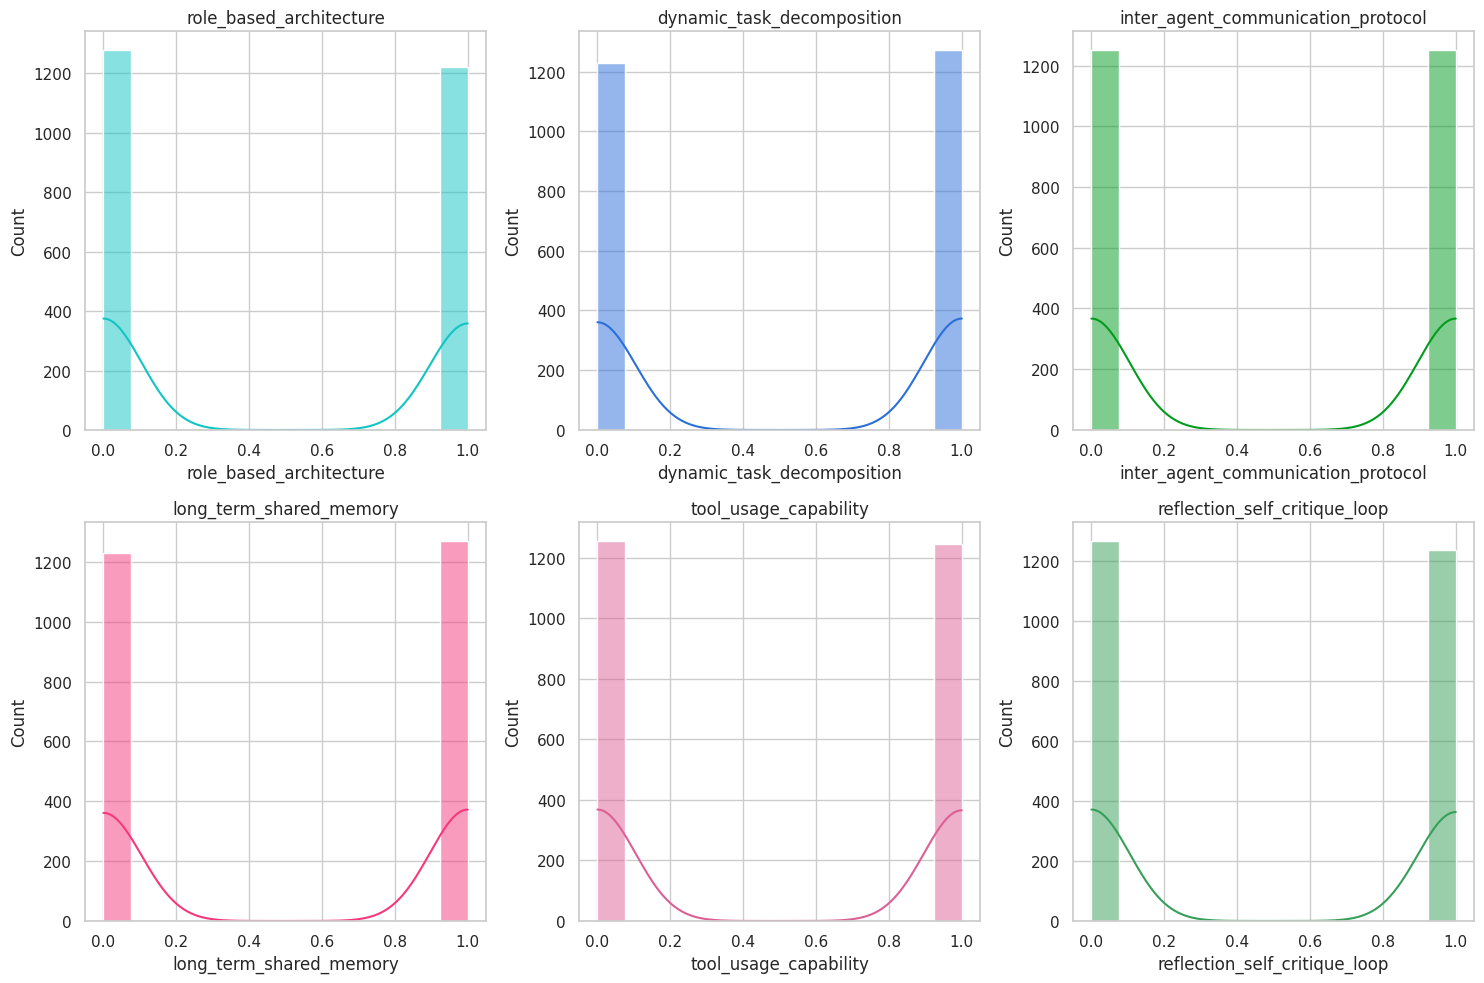

In [17]:
plt.figure(figsize=(15,10))

for i, col in enumerate(df.columns[:6], 1):
    plt.subplot(2,3,i)
    sns.histplot(df[col], kde=True, color=np.random.rand(3,))
    plt.title(col)

plt.tight_layout()
plt.show()

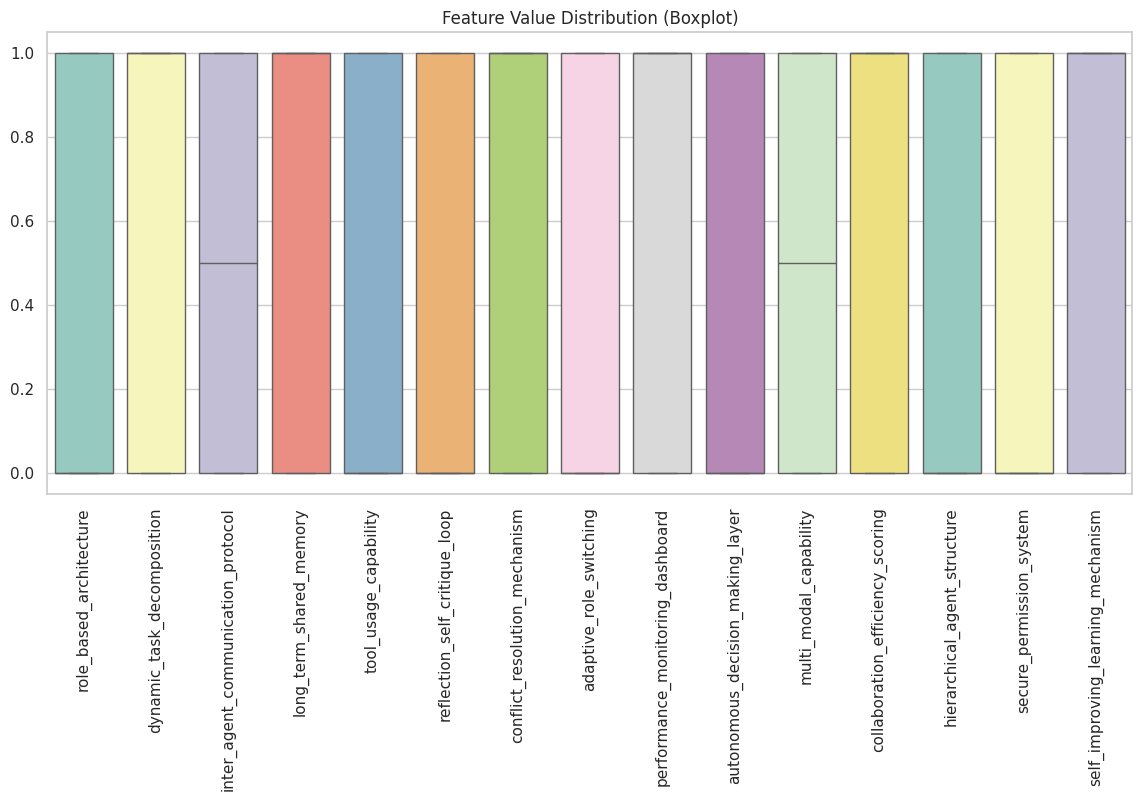

In [18]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df,
            palette='Set3')

plt.xticks(rotation=90)
plt.title("Feature Value Distribution (Boxplot)")
plt.show()

In [19]:
categories = df.columns
values = df.mean().values

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=values,
    theta=categories,
    fill='toself',
    line_color='purple'
))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    title="Multi-Agent Architecture Capability Radar"
)

fig.show()

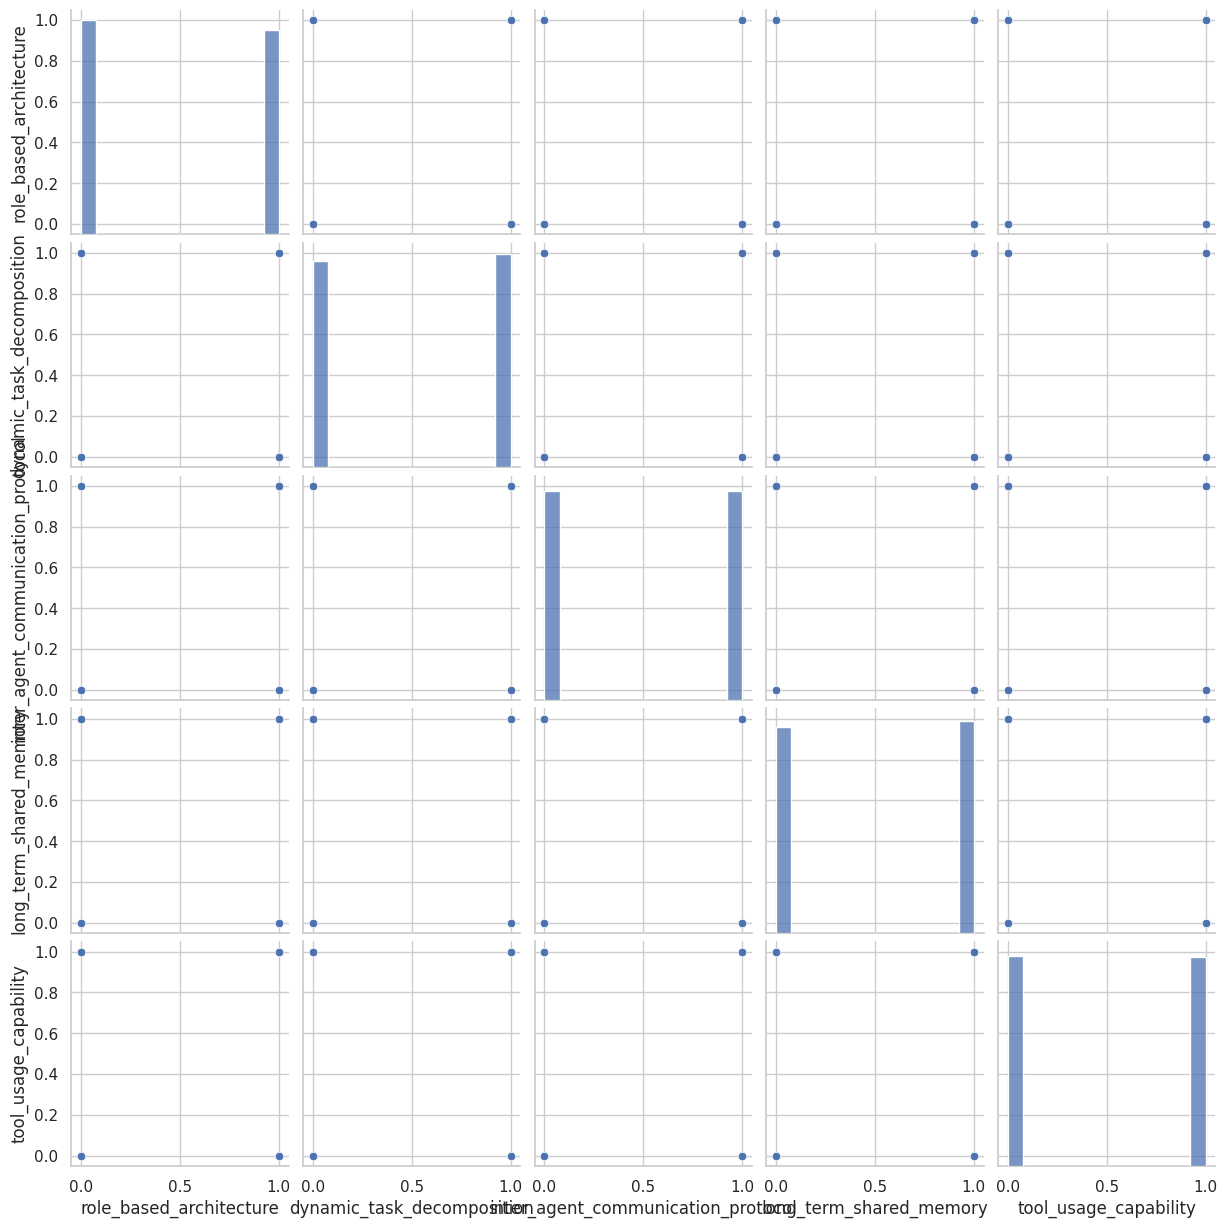

In [20]:
sns.pairplot(df.iloc[:, :5], 
             palette='husl')

plt.show()

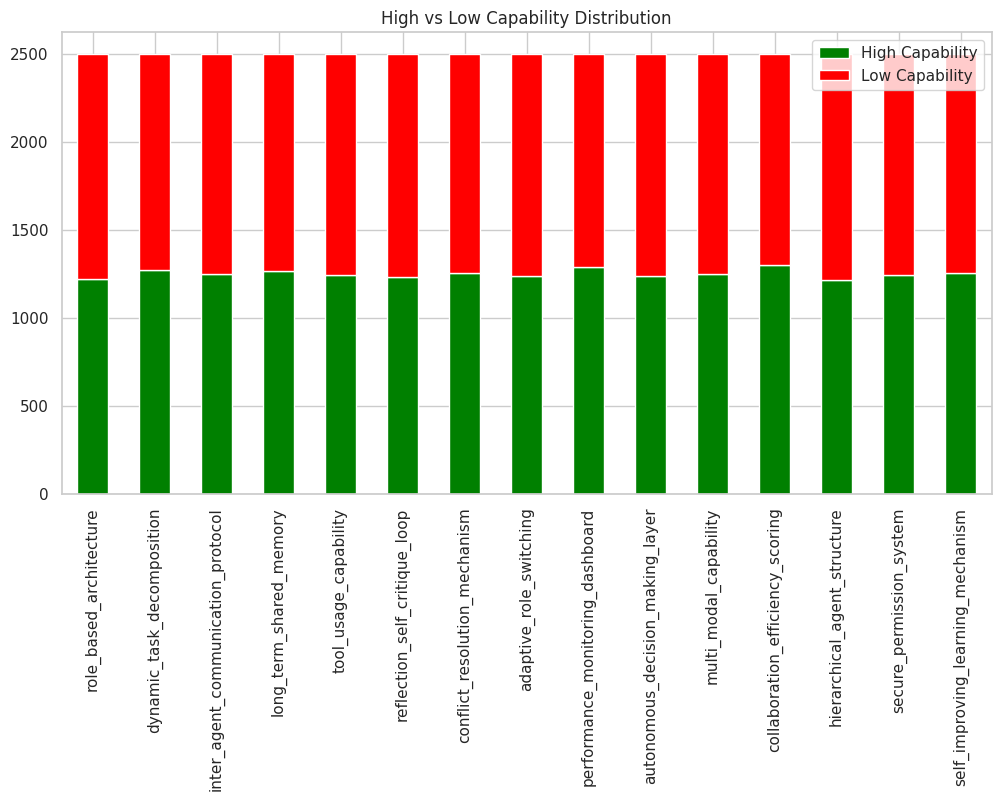

In [21]:
high_cap = (df > df.mean()).sum()
low_cap = (df <= df.mean()).sum()

stack_df = pd.DataFrame({
    "High Capability": high_cap,
    "Low Capability": low_cap
})

stack_df.plot(kind='bar',
              stacked=True,
              color=['green','red'],
              figsize=(12,6))

plt.xticks(rotation=90)
plt.title("High vs Low Capability Distribution")
plt.show()

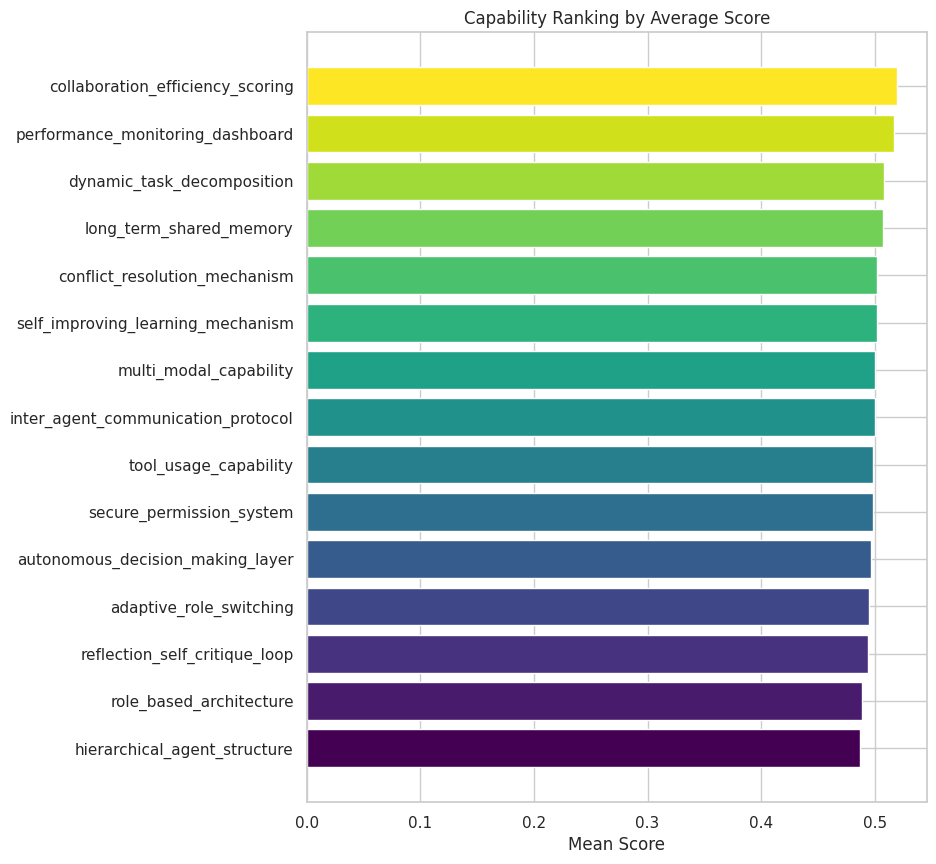

In [22]:
sorted_mean = df.mean().sort_values()

plt.figure(figsize=(8,10))
plt.barh(sorted_mean.index,
         sorted_mean.values,
         color=plt.cm.viridis(np.linspace(0,1,len(sorted_mean))))

plt.title("Capability Ranking by Average Score")
plt.xlabel("Mean Score")
plt.show()

## ML Algo

In [23]:
target = "self_improving_learning_mechanism"

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import classification_report

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [25]:
target = "self_improving_learning_mechanism"

X = df.drop(columns=[target])
y = df[target]

In [26]:
if y.dtype == "object":
    le = LabelEncoder()
    y = le.fit_transform(y)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [28]:
numerical_cols = X.columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ]
)

In [29]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

In [30]:
results = {}

for name, model in models.items():
    
    pipeline = Pipeline(steps=[
        ('preprocessing', preprocessor),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred) * 100
    results[name] = accuracy
    
    print(f"{name} Accuracy: {accuracy:.2f}%")

Logistic Regression Accuracy: 50.00%
Random Forest Accuracy: 49.20%
Decision Tree Accuracy: 49.20%
SVM Accuracy: 53.40%
AdaBoost Accuracy: 50.20%


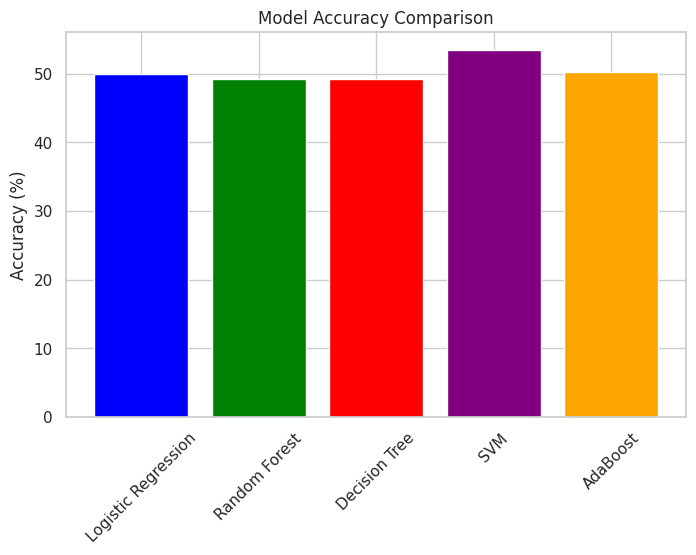

In [31]:
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), 
        color=['blue','green','red','purple','orange'])

plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.show()

## Thank you..pls upvote!!